In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [4]:
import pandas as pd
df = pd.read_csv("bitcoin_data.csv")
df.head()


,Timestamp,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
0,1/1/17 0:00,966.34,1005.00,960.53,997.75,6850.59,6764742.06,987.47
1,1/2/17 0:00,997.75,1032.00,990.01,1012.54,8167.38,8273576.99,1013.00
2,1/3/17 0:00,1011.44,1039.00,999.99,1035.24,9089.66,9276500.31,1020.56
3,1/4/17 0:00,1035.51,1139.89,1028.56,1114.92,21562.46,23469644.96,1088.45
4,1/5/17 0:00,1114.38,1136.72,885.41,1004.74,36018.86,36211399.53,1005.35


In [9]:
# a = 778.70000
# b = 19187.78000
# print(b-a)

In [17]:
# Get a subset of the data i.e. rows 5 to 13
# Use the TV column as the predictor
x_true = df.Open.iloc[5:13]

# Use the Sales column as the response
y_true = df.High.iloc[5:13]

# Sort the data to get indices ordered from lowest to highest TV values
idx = np.argsort(x_true,y_true).values 

# Get the predictor data in the order given by idx above
x_true  = x_true.iloc[idx].values

# Get the response data in the order given by idx above
y_true  = y_true.iloc[idx].values


In [18]:
# Define a function that finds the index of the nearest neighbor 
# and returns the value of the nearest neighbor.  
# Note that this is just for k = 1 where the distance function is 
# simply the absolute value.

def find_nearest(array,value):
    
    # Hint: To find idx, use .idxmin() function on the series
    idx = pd.Series(np.abs(array-value)).idxmin()

    # Return the nearest neighbor index and value
    return idx, array[idx]


In [19]:
# Create some synthetic x-values (might not be in the actual dataset)
x = np.linspace(np.min(x_true), np.max(x_true))

# Initialize the y-values for the length of the synthetic x-values to zero
y = np.zeros((len(x)))


In [20]:
# Apply the KNN algorithm to predict the y-value for the given x value
for i, xi in enumerate(x):

    # Get the Sales values closest to the given x value
    y[i] = y_true[find_nearest(x_true, xi )[0]]

Text(0, 0.5, 'Close')

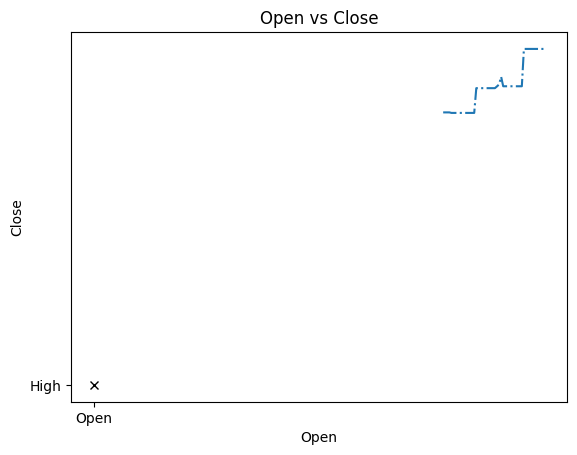

In [21]:
# Plot the synthetic data along with the predictions    
plt.plot(x, y, '-.')

# Plot the original data using black x's.
plt.plot("Open","High" , 'kx')

# Set the title and axis labels
plt.title('Open vs Close')
plt.xlabel('Open')
plt.ylabel('Close')


In [7]:
cdf = df[["Open","Volume (BTC)","Volume (Currency)","High","Low","Close"]]
cdf.head(10)

,Open,Volume (BTC),Volume (Currency),High,Low,Close
0,966.34,6850.59,6764742.06,1005.00,960.53,997.75
1,997.75,8167.38,8273576.99,1032.00,990.01,1012.54
2,1011.44,9089.66,9276500.31,1039.00,999.99,1035.24
3,1035.51,21562.46,23469644.96,1139.89,1028.56,1114.92
4,1114.38,36018.86,36211399.53,1136.72,885.41,1004.74
5,1004.73,27916.70,25523261.28,1026.99,871.00,893.89
6,894.02,20401.11,17624310.02,907.05,812.28,906.20
7,906.20,8937.49,8168170.35,941.81,881.30,909.75
8,909.80,8716.18,7780059.06,912.87,875.00,896.23
9,896.09,8535.52,7704271.20,912.47,889.41,905.05


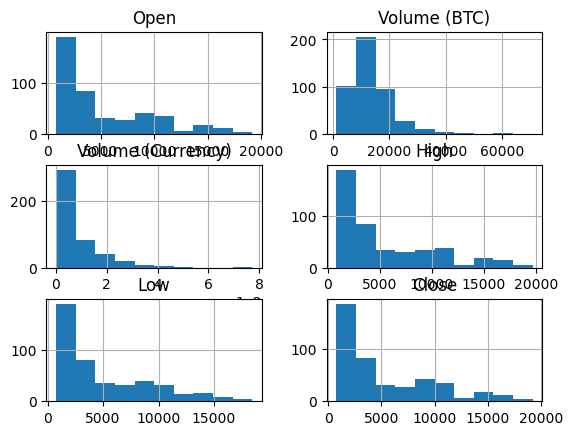

In [28]:
viz1 = cdf[["Open","Volume (BTC)","Volume (Currency)","High","Low","Close"]]
viz1.hist()
plt.show()

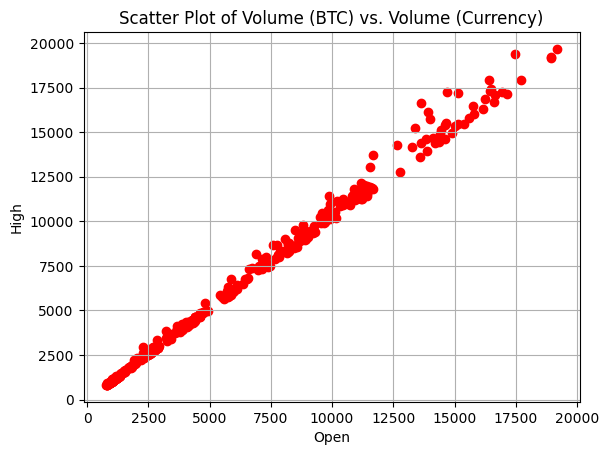

In [30]:
import matplotlib.pyplot as plt 
plt.scatter(cdf.Open, cdf.High,color="red")
plt.xlabel('Open')
plt.ylabel('High')
plt.title('Scatter Plot of Volume (BTC) vs. Volume (Currency)')
plt.grid(True)
plt.show()

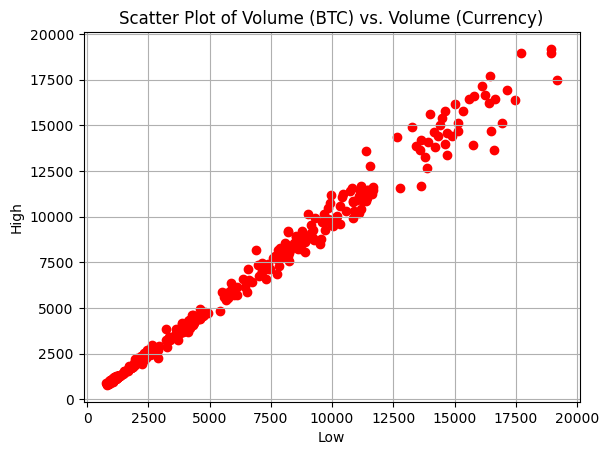

In [25]:
import matplotlib.pyplot as plt 
plt.scatter(cdf.Close, cdf.Open,color="red")
plt.xlabel('Low')
plt.ylabel('High')
plt.title('Scatter Plot of Volume (BTC) vs. Volume (Currency)')
plt.grid(True)
plt.show()

In [34]:
import numpy as np
msk = np.random.rand(len(df)) <.8
train = cdf[msk]
test = cdf[~msk]
# print(f"this is data about the train{train}")
# print(f"this is data about the test{test}")

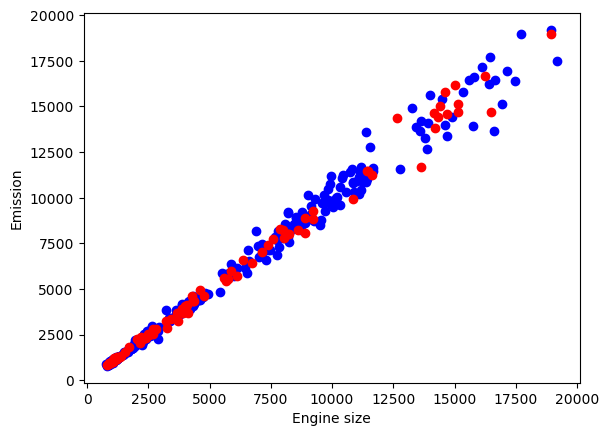

In [35]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(train.Close, train.Open,  color='blue')
ax1.scatter(test.Close, test.Open,  color='red')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [37]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Open']])
train_y = np.asanyarray(train[['Close']])
test_x = np.asanyarray(test[['Open']])
test_y = np.asanyarray(test[['Close']])
regr.fit (train_x, train_y)
regr.fit(test_x,test_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)
print()

Coefficients:  [[0.9948233]]
Intercept:  [64.61364743]



Text(0, 0.5, 'Emission')

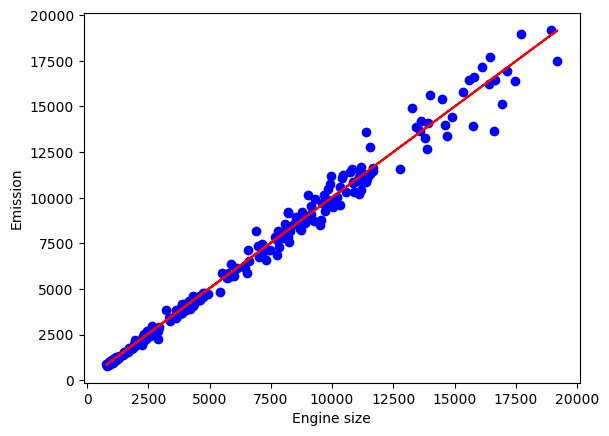

In [38]:
plt.scatter(train.Close, train.Open,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [39]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Close']])
test_y = np.asanyarray(test[['Open']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 235.77
Residual sum of squares (MSE): 187759.39
R2-score: 0.99


In [41]:
# from sklearn.metrics import r2_score

# test_x_poly = poly.fit_transform(test_x)
# test_y_ = clf.predict(test_x_poly)

# print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
# print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
# print("R2-score: %.2f" % r2_score(test_y,test_y_ ) )